# Session

going through basic ML

- linear regression

svm: not linear, not used frequently

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
diabetes_X.shape

(442, 10)

In [4]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

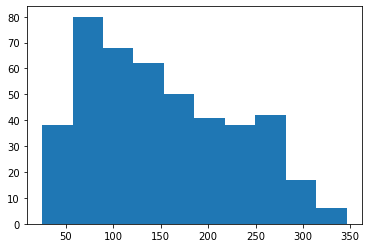

In [8]:
# histogram
plt.hist(diabetes_y)

# sometimes np.log(data) helps

In [12]:
# choose one feature out of 10 features
diabetes_X_1 = diabetes_X[:, np.newaxis, 2]

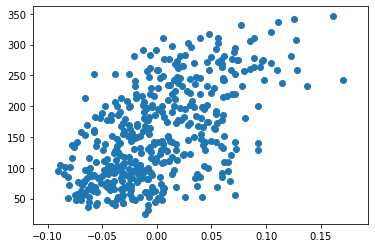

In [17]:
# plt.scatter(diabetes_X_1, [i for i in range(len(diabetes_X_1))])
plt.scatter(diabetes_X_1, diabetes_y)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <a list of 10 Patch objects>)

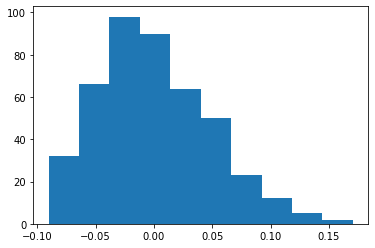

In [15]:
plt.hist(diabetes_X_1)

In [19]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_1[:-20]
diabetes_X_test = diabetes_X_1[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [21]:
print('train size:', len(diabetes_X_train))
print('test size:', len(diabetes_X_test))

train size: 422
test size: 20


## Make and Train model

In [23]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [26]:
# more than one feature: scaling, normalizing needed
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# ideally, in linear regression the model learns a straight line.

In [29]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [32]:
regr.coef_

array([938.23786125])

In [33]:
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [35]:
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

## Evaluating

In [39]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
# industry 목표 .65~.7
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


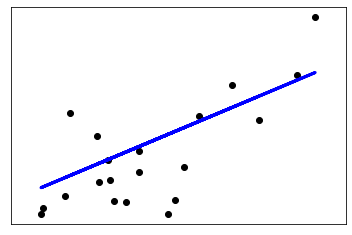

In [40]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### apply with other features

In [43]:
diabetes_X_2 = diabetes_X[:, np.newaxis, 6]

In [64]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X = diabetes_X[:, 1:]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [65]:
# !!! for multivairant data
scaler = StandardScaler()
scaler.fit(diabetes_X_train)
diabetes_X_train = scaler.transform(diabetes_X_train)
diabetes_X_test = scaler.transform(diabetes_X_test)

In [66]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Train the model using the training sets

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [-11.29964236  24.29540691  15.60201069 -38.63698376  23.38884141
   4.82064021   8.79890968  35.64786254   3.60855101]
Mean squared error: 2004.30
Coefficient of determination: 0.59


removing feature is not always recommended.

## Classification

In [68]:
dataset = pd.read_csv('data/iris.data', names   =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [71]:
#Create 3 DataFrame for each Species
setosa=dataset[dataset['Species']=='Iris-setosa']
versicolor =dataset[dataset['Species']=='Iris-versicolor']
virginica =dataset[dataset['Species']=='Iris-virginica']

print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25%         5.600000      2.525000       4.000000      1.200000
50%         5.900000      2.800000      

In [72]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


mean and median shows skewness

<Figure size 432x288 with 0 Axes>

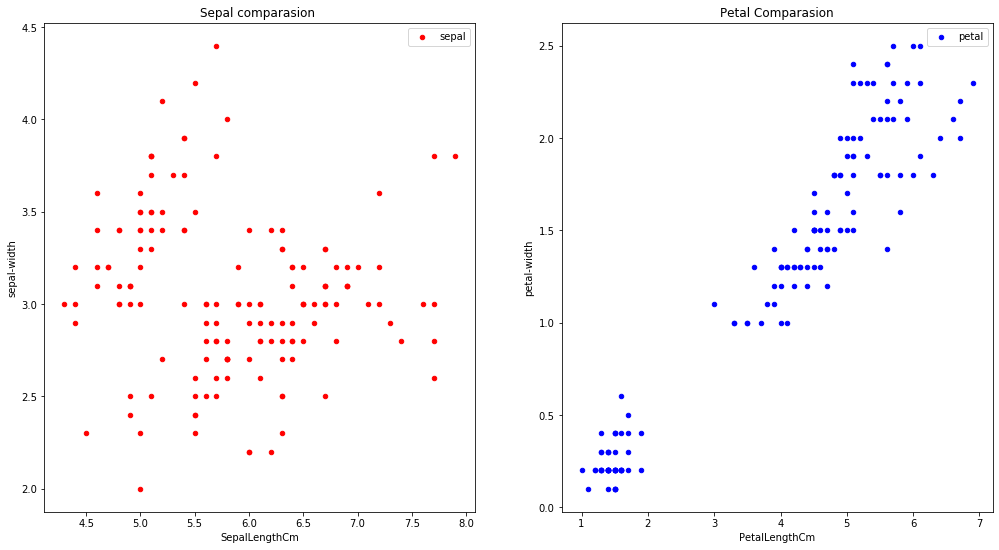

In [73]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
dataset.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
dataset.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

<Figure size 432x288 with 0 Axes>

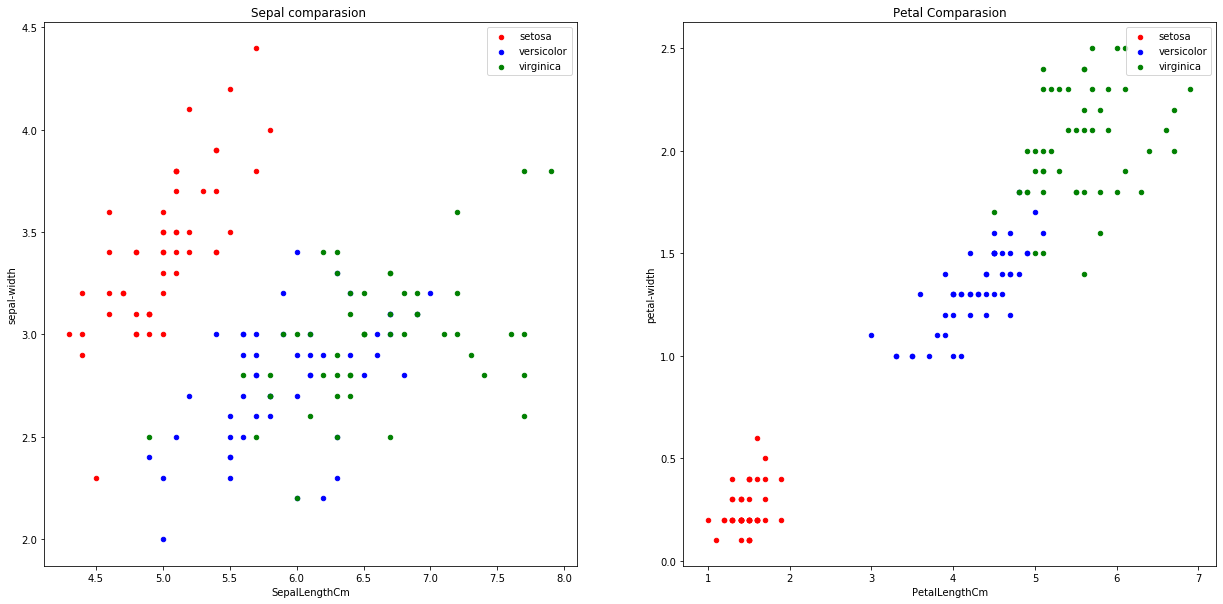

In [74]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

<Figure size 432x288 with 0 Axes>

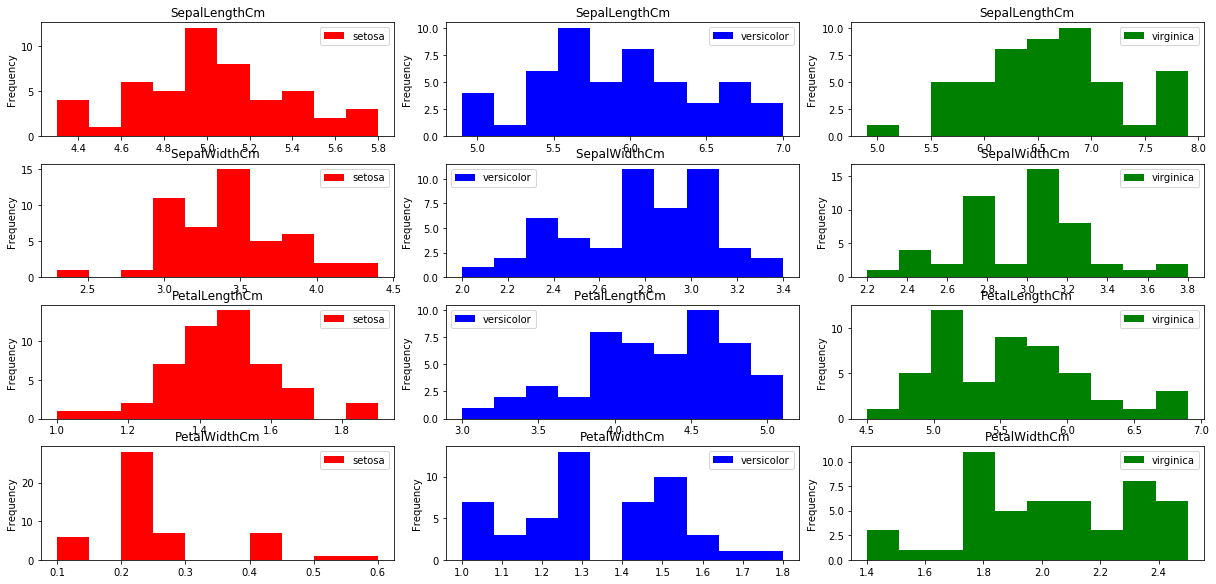

In [78]:
plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLengthCm"].plot(kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidthCm"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLengthCm"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidthCm"].plot(kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()
plt.close()


In [83]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=50)

In [98]:
x_train.shape

(105, 2)

In [99]:
# applyign standard scalar
scalar = StandardScaler()
scalar.fit(x_train)
x_scaled_tr = scalar.transform(x_train)
x_scaled_te = scalar.transform(x_test)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(x_scaled_tr, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
logreg2=LogisticRegression()
logreg2.fit(x_scaled_tr, y_train)

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_hat = logreg.predict(x_scaled_te)
accuracy_score(y_test, y_hat)

0.8222222222222222

In [111]:
confusion_matrix(y_test, y_hat, labels=[0,1,2])

array([[13,  1,  0],
       [ 0, 12,  5],
       [ 0,  2, 12]], dtype=int64)

DecisionTree

In [154]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
dt_clf = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf=1)
dt_clf = dt_clf.fit(x_train, y_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [155]:
# hyperparameters of model: the parameters of the class
# criterion: which method we are going to use?

In [156]:
y_hat = dt_clf.predict(x_test)

In [137]:
accuracy_score(y_test, y_hat)

0.7111111111111111

In [125]:
confusion_matrix(y_test, y_hat)

array([[13,  1,  0],
       [ 4,  6,  7],
       [ 0,  2, 12]], dtype=int64)

In [139]:
from sklearn.model_selection import GridSearchCV

In [147]:
"""
 ***
 grid search: give a parameter and show results of the tweak of parameter
"""

parameters = {'max_depth':[1, 5, 10, 15]}
dt_clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, scoring='accuracy', cv=10) # cv: cross validation
clf.fit(X, Y) # give total data and gridsearch automatically splits data
clf.cv_results_

{'mean_fit_time': array([0.        , 0.00099943, 0.00099907, 0.0005002 ]),
 'std_fit_time': array([0.        , 0.00199885, 0.00199814, 0.00150061]),
 'mean_score_time': array([0., 0., 0., 0.]),
 'std_score_time': array([0., 0., 0., 0.]),
 'param_max_depth': masked_array(data=[1, 5, 10, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': 15}],
 'split0_test_score': array([0.66666667, 1.        , 1.        , 1.        ]),
 'split1_test_score': array([0.66666667, 0.93333333, 0.93333333, 0.93333333]),
 'split2_test_score': array([0.66666667, 1.        , 1.        , 1.        ]),
 'split3_test_score': array([0.66666667, 0.93333333, 0.93333333, 0.93333333]),
 'split4_test_score': array([0.66666667, 0.93333333, 0.93333333, 0.93333333]),
 'split5_test_score': array([0.66666667, 0.86666667, 0.86666667, 0.86666667]),
 'split6_test_score': array([0.66666667,

In [151]:
"""
 ***
 grid search: give a parameter and show results of the tweak of parameter

 there is also randomized grid search which is a little bit faster
"""

parameters = {'max_depth':[1, 5, 10, 15]}
dt_clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, scoring='accuracy', cv=3) # cv: cross validation
clf.fit(X, Y) # give total data and gridsearch automatically splits data
clf.cv_results_

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0., 0., 0., 0.]),
 'std_fit_time': array([0., 0., 0., 0.]),
 'mean_score_time': array([0.        , 0.00166504, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.00235472, 0.        , 0.        ]),
 'param_max_depth': masked_array(data=[1, 5, 10, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': 15}],
 'split0_test_score': array([0.66666667, 0.98039216, 0.98039216, 0.98039216]),
 'split1_test_score': array([0.66666667, 0.92156863, 0.92156863, 0.92156863]),
 'split2_test_score': array([0.66666667, 0.97916667, 1.        , 0.97916667]),
 'mean_test_score': array([0.66666667, 0.96      , 0.96666667, 0.96      ]),
 'std_test_score': array([0.        , 0.02758824, 0.03333333, 0.02758824]),
 'rank_test_score': array([4, 2, 1, 2])}

In [158]:
help(tree)

Help on package sklearn.tree in sklearn:

NAME
    sklearn.tree

DESCRIPTION
    The :mod:`sklearn.tree` module includes decision tree-based models for
    classification and regression.

PACKAGE CONTENTS
    _criterion
    _reingold_tilford
    _splitter
    _tree
    _utils
    export
    setup
    tests (package)
    tree

CLASSES
    sklearn.base.ClassifierMixin(builtins.object)
        sklearn.tree.tree.DecisionTreeClassifier(sklearn.tree.tree.BaseDecisionTree, sklearn.base.ClassifierMixin)
            sklearn.tree.tree.ExtraTreeClassifier
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.tree.tree.DecisionTreeRegressor(sklearn.tree.tree.BaseDecisionTree, sklearn.base.RegressorMixin)
            sklearn.tree.tree.ExtraTreeRegressor
    sklearn.tree.tree.BaseDecisionTree(sklearn.base.BaseEstimator, sklearn.base.MultiOutputMixin)
        sklearn.tree.tree.DecisionTreeClassifier(sklearn.tree.tree.BaseDecisionTree, sklearn.base.ClassifierMixin)
            sklearn.tree.

## Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


In [212]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


## SVM

non linear model.

In [242]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)
clf.cv_results_

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\visitor.slsi\app

{'mean_fit_time': array([0.00166694, 0.00165264, 0.        , 0.        ]),
 'std_fit_time': array([0.00235741, 0.00233718, 0.        , 0.        ]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00166591]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.00235595]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([1.        , 0.98039216, 1.        , 0.98039216]),
 'split1_test_score': array([0.96078431, 0.96078431, 0.92156863, 0.96078431]),
 'split2_test_score': array([0.97916667, 0.97916667, 1.        , 1.        ]),
 'mean_